In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire Data
categorical - pclass, Survived, Sex, Embarked
numbercal - Age, Fare, Parch, Sibsp

In [3]:
train_knk = pd.read_csv('../data/train.csv')
test_knk = pd.read_csv('../data/test.csv')
combine = [train_knk, test_knk]

In [4]:
print(train_knk.columns.values)
# categorical 인지 numerical인지 구분 필요

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_knk.describe(include='all') # include='all' 미입력시 숫자만 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ayoub, Miss. Banoura",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_knk.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_knk.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Mix Data Type

Numerical, Alphabumber 데이터  => Correcting

Ticket , cabin

Name변수의 경우 여러가지 variation 이 있어 고쳐줘야한다

In [8]:
train_knk.info()
print('*'*40)
test_knk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Distribution of numerical feature values across the samples

In [9]:
train_knk.describe()  #numerical 정보만 출력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_knk.describe(include=['O'])  #categroical 정보만 출력 0이 아니라 대문자 O

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ayoub, Miss. Banoura",male,347082,G6,S
freq,1,577,7,4,644


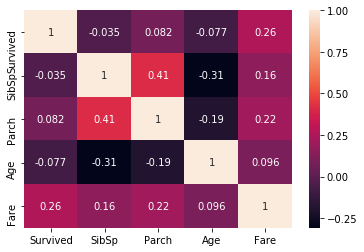

In [11]:
g=sns.heatmap(train_knk[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True)

#annot => 숫자를 출력할지 안할지 결정

In [12]:
print(pd.isnull(train_knk).sum()) #널이 몇개인지 출력

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print(pd.isnull(test_knk).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#Assumtions based in dataanalysis

- Correlating :구조와 연관된 변수를 찾아 나가는 과정

- Completing : 빈 값들을 넣는것(Age, Embarked)=> 이유 survived와 연관 높을 수 있기  때문이다.

- Correcting : Ticket, Cabin, passenger, id, Name =>중복값이 많거나 필요 없어서 삭제

- Creating :1.Parch, SibSp => FamilySize /2. Name을 정리해보자 / 3. Age그룹 => ordinal 변수를 categorical화 한다. / 4. Fare 그룹 

- Classifying 

In [14]:
train_knk[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


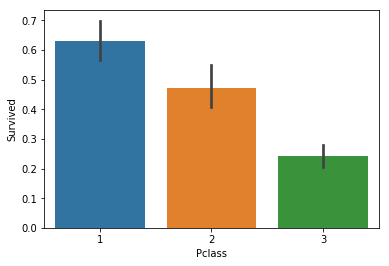

In [15]:
# draw a bar plot if survival by Pclass
sns.barplot(x='Pclass',y='Survived', data=train_knk)

In [16]:
train_knk[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


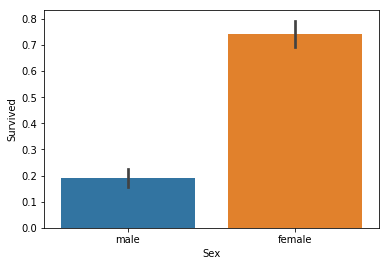

In [17]:
sns.barplot(x='Sex',y='Survived', data=train_knk)

In [18]:
train_knk[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


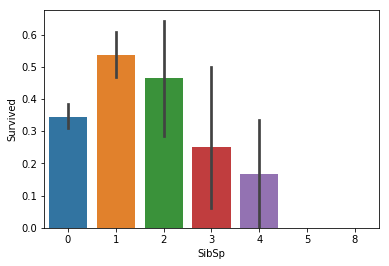

In [19]:
sns.barplot(x='SibSp',y='Survived', data=train_knk)

In [20]:
train_knk[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


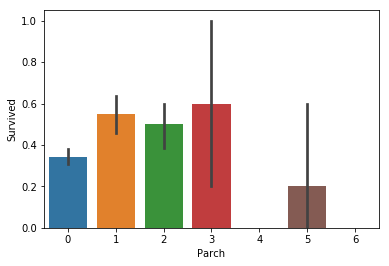

In [21]:
sns.barplot(x='Parch',y='Survived', data=train_knk)

### 1.Observation 
- plcass = 1 이 Survived 와 연관이 높은 것 같다.
- sex = Female 굉장히 높은 survival rate을 가진다(74%)
- SibSp, Parch 딱히 상관관계가 없는 것 같다. (혼자온 사람들의 생존율이 높을 수도 있다.)

### 2.Decision

- Pclass 모델에 활용
- Sex 모델에 활용
- SibSp, Parch => 다른 방식으로 활용

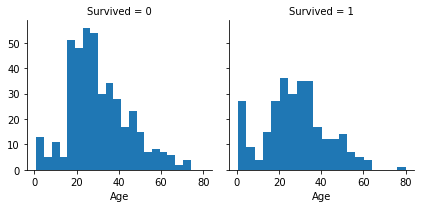

In [22]:
g = sns.FacetGrid(train_knk, col='Survived')
g.map(plt.hist, 'Age', bins =20)

### 1. Observation
- Age < 4~5살 => Survive Rate 높다
- 80세 승객이 구출 되었음
- 15 ~ 30살 => 구출되지 못함
- 15 ~ 30살 분포를 보인다.

### 2. Decision
- Age 값이 경향성을 보일 수 있겠다 => 모델링 넣는다
- Null 값 채우자
- 나이를 그룹화 하자

# Analyzie by visualizing data

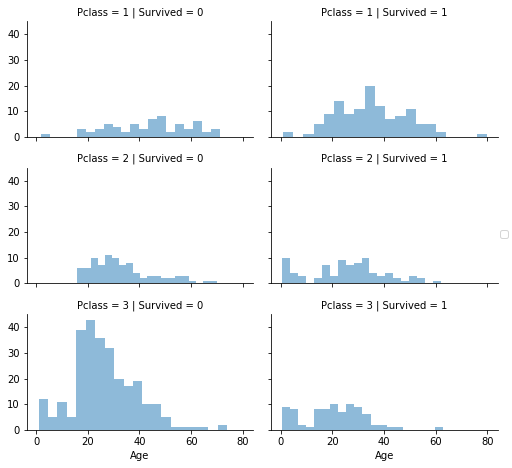

In [23]:
grid = sns.FacetGrid(train_knk, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


### 1. Observation
- Plcass = 1 생존율이 높아 보인다
- Pclass 와 상관없이 어린 승객들은 구조율이 높다
- Pclass = 3 구조율이 낮다

### 2. Decision
- Pclass도 모델 트레이닝에 포함시키자

C:\Users\run67\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\run67\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


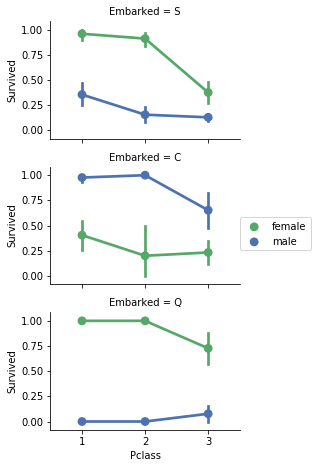

In [24]:
grid = sns.FacetGrid(train_knk, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived', 'Sex', palette='deep')
grid.add_legend()


### 1. Observation

- Embarked = C 를 제외하고 Female의 생존율이 높다
- Embarked = C 의 경우 생존율이 높은대 이는 Pclass와 Embarked간의 관계로 인해 영향을 미친 것으로 보인다
- Male은 Q 에서 C 보다 Pclass=3 에서 생존율이 높다

### 2.Decison

- 성별을 모델에 넣고, Embarked도 넣는데 => Null값을 채우자


C:\Users\run67\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


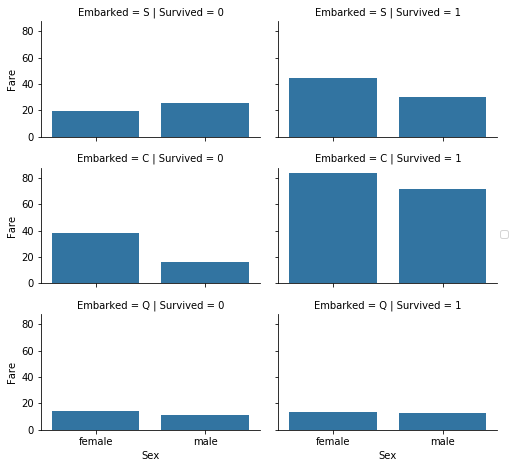

In [25]:
grid = sns.FacetGrid(train_knk, row='Embarked',col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot,'Sex','Fare', ci=None)
grid.add_legend()


### 1.Observation

- 높은 Fare를 내는 승객의 생존율이 높음
- Embarked도 관련 있을 수 있음

### 2. Decision

- Fare도 모델링에 고려하겠음

# Correcting by dropping features

In [26]:
print("Before", train_knk.shape, test_knk.shape, combine[0].shape, combine[1].shape)

train_knk = train_knk.drop(['Ticket', 'Cabin'], axis=1) # axis=0 - Index, 1 - columns
test_knk = test_knk.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_knk, test_knk]

print("After", train_knk.shape, test_knk.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [27]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=True)
    #[A-Za-z] 알파벳 모두 정규식
    #+ 바로 앞에 문자가 1번이상 반복(즉 알파벳/단어 반복)
    # \. <. 이 붙은 단어 찾기
pd.crosstab(train_knk['Title'],train_knk['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_knk[['Title','Survived']].groupby(['Title'], as_index=False).mean()

        

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
#map each ot the title groups to a numerical value
title_mapping = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Rare' : 5 }

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)   # fillna(0) 일단 null 값을 0으로 채워라
    
train_knk.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [30]:
train_knk = train_knk.drop(['Name', 'PassengerId'], axis=1)
test_knk = test_knk.drop(['Name'], axis=1)
combine = [train_knk, test_knk]

train_knk.shape, test_knk.shape

((891, 9), (418, 9))

In [31]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male' : 0}).astype(int)
    
train_knk

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


# completing a numerical contunuous feature

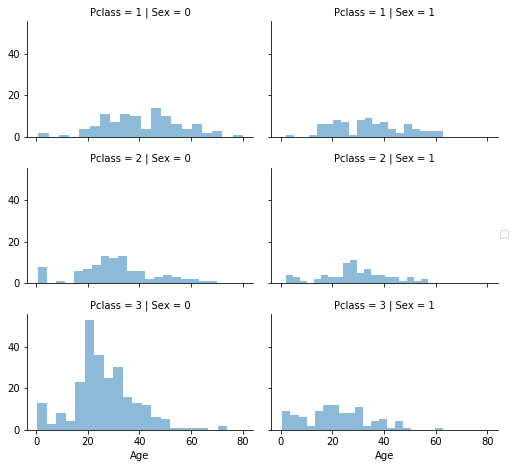

In [32]:
grid = sns.FacetGrid(train_knk, row='Pclass', col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5,bins=20)
grid.add_legend()

In [33]:
guess_ages = np.zeros((2,3))
guess_ages
# Sex(0,1)과 Pclass(1,2,3) 6가지 콤비네이션이 발생가능 ==> 6갸 넣을 수 있는 guess_age 변수를 만듬

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i)& (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            #drop na values
            age_guess = guess_df.median()
            #Convert random age float to neares .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)

In [35]:
train_knk['AgeBand'] = pd.cut(train_knk['Age'],5)
train_knk[['AgeBand', 'Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [36]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [37]:
train_knk = train_knk.drop(['AgeBand'],axis =1)
combine = [train_knk, test_knk]
train_knk.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_knk[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
    
    train_knk[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [40]:
train_knk = train_knk.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_knk = test_knk.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_knk, test_knk]

train_knk.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [41]:
train_knk.Embarked.dropna().mode()

0    S
dtype: object

In [42]:
freq_port = train_knk.Embarked.dropna().mode()[0]  # most common value
freq_port

'S'

In [43]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_knk[['Embarked', 'Survived']].groupby(['Embarked'], 
                                           as_index=False).mean().sort_values(by='Survived', ascending=False)



,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_knk.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [45]:
test_knk['Fare'].fillna(test_knk['Fare'].dropna().median(), inplace=True)
test_knk.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [46]:
train_knk['FareBand'] = pd.qcut(train_knk['Fare'], 4) #quantile based cut
train_knk[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
# Convert the Fare feature to ordinal values(FareBand기준)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_knk = train_knk.drop(['FareBand'], axis=1)
combine = [train_knk, test_knk]
    
train_knk.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


In [48]:
test_knk.head(10)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,1,0,2,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,1,3,1
9,901,3,0,1,2,0,1,0


In [49]:
X_train = train_knk.drop("Survived", axis=1)
Y_train = train_knk["Survived"]
X_test  = test_knk.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [50]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


81.14

In [51]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


83.28

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

In [53]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

In [54]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\run67\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.91

In [55]:

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


80.02

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [57]:

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
             'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
               acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,86.64
7,Decision Tree,86.64
1,KNN,84.62
0,Support Vector Machines,83.28
2,Logistic Regression,81.14
6,Linear SVC,80.02
5,Perceptron,79.91
4,Naive Bayes,77.33


In [61]:
submission = pd.DataFrame({
        "PassengerId": test_knk["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('../data/test.csv', index=False)

# drop na values
# Covert random age float to nearest .5 age